c:\Users\Szymon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Szymon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Szymon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Logistic Regression
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61

SVM
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.38      0.25      0.30        12
           2       0.29      0.22      0.25         9
           3       0.15      0.29      0.20         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.33      0.34      0.32        61
weighted avg       0.52      0.56      0.53        

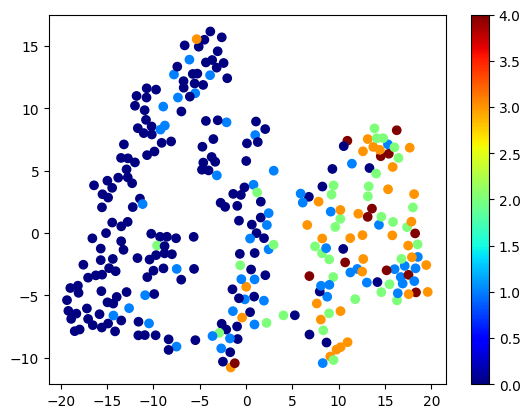

In [2]:
# Importowanie niezbędnych bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Importowanie zbioru danych z UCI
from ucimlrepo import fetch_ucirepo

# Pobieranie zbioru danych
heart_disease = fetch_ucirepo(id=45)

# Dane (jako ramki danych pandas)
X = heart_disease.data.features
y = heart_disease.data.targets

# Ograniczenie zbioru danych do 5000 próbek
X = X[:5000]
y = y[:5000]

# Wypełnianie brakujących wartości (NaN) za pomocą SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Kodowanie zmiennych tekstowych na wartości numeryczne
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = preprocessor.fit_transform(X)

# Konwersja y do jednowymiarowej tablicy
y = y.values.ravel()

# Przygotowanie danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenowanie klasyfikatorów
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predykcja i ocena wyników
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression\n", classification_report(y_test, y_pred_log_reg))

y_pred_svm = svm.predict(X_test)
print("SVM\n", classification_report(y_test, y_pred_svm))

y_pred_knn = knn.predict(X_test)
print("KNN\n", classification_report(y_test, y_pred_knn))

# Redukcja wymiarowości przy użyciu TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Wizualizacja wyników - t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_svd)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()
